In [1]:
#1980'lerden günümüze kadar oyun satışlarını içeren bir veri seti var elimizde 
#video oyunlarının kürewsel çapta satılmalarıyla ilgili çeşitli bilgiler içeriyor 
import numpy as np
import pandas as pd
import scipy.stats as st

pd.set_option("display.max_columns",None) #DataFrame'i yazdırdığınızda veya görüntülediğinizde tüm sütunlar görüntülenecektir.

In [2]:
import math
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
#Özelliklerin ölçeklendirilmesi, veri setindeki her bir özelliği (sütun) ortalama değeri sıfır, 
#standart sapması ise bir olacak şekilde dönüştürür. 
#Bu işlem, özelliklerin farklı ölçeklere veya birimlere sahip olması durumunda kullanışlıdır.

#Ölçeklendirme, birçok makine öğrenimi algoritması için önemlidir. Özelliklerin benzer bir ölçeğe sahip olması, 
#algoritmanın doğru bir şekilde çalışmasına ve bir özellik tarafından diğerlerine göre etkilenmenin dengelenmesine yardımcı olur.

In [3]:
data=pd.read_csv("vgsales.csv")

In [4]:
data.shape
#11 sütun 16598 satır var oldukça uzun bu yüzden standardscaler çağırdık 

(16598, 11)

In [5]:
data.head()#sitede göremediğimiz sütunları yazdığımız kod ile tamamını gördük 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
#other_sales açıklanan bölgeler dışındaki bölgerler global_sales ise oyunun küresel olarak elde ettiği toplam satış miktarından
#bahseidoyee

data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#çoğunlukla 2015 ve sonrasında eksik veriler bulunuyor bunları çıkartalım 
drop_row_index=data[data["Year"]>2015].index
data=data.drop(drop_row_index)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
data.shape
#görüldüğü üzere satır sayısı 16598'den 16250'ye düştü 

(16250, 11)

In [10]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
data.describe()
#Year sütunu 1980'den başlamış 2015 yılına kadar gitmiş 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
 data.describe(include=["object","bool"]) #object ve bool türündeki verileri gösteiryoruz burada
    #count denilen şey sütunun boş olmayan değerlerinin sayısını veriyor 
    #unique benzersiz verilerin sayısını veriyor burada türleir görüyoruz
    #top denilen ise en sık görülen değeri gösteriyor 
    #freq ise en sık bulunan dğerlerin gösterilme değerini gösteriyoru

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [13]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
data["Genre"].value_counts()
#genre sayısını ekrana yazdırıyoruz burada da 
#tür sayılarını gördük 

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

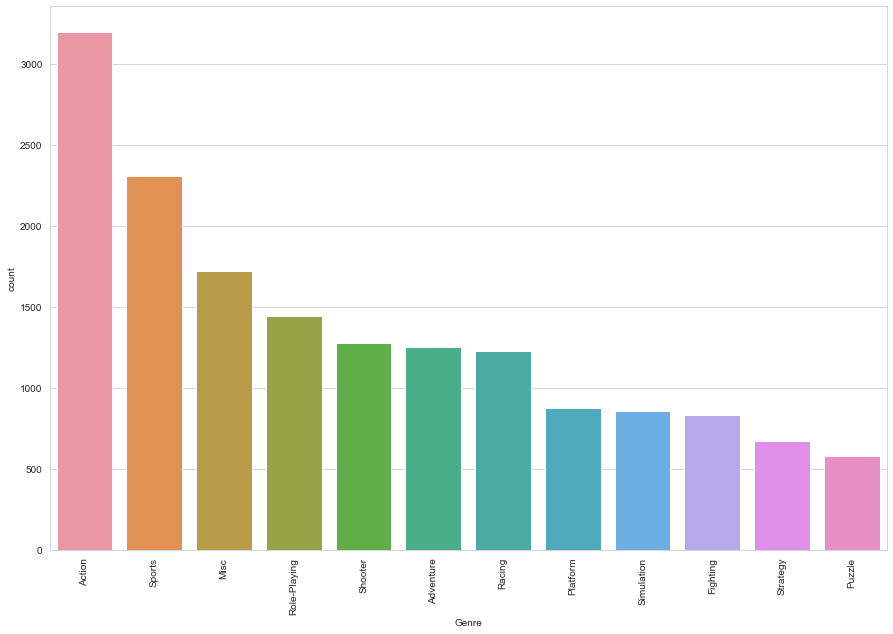

In [15]:
#şimdi de en çok satış yapanı görelim 
plt.figure(figsize=(15,10))
sns.countplot(x="Genre",data=data,order=data["Genre"].value_counts().index)
plt.xticks(rotation=90)
#sayma grafiği oluşturuyoruz.
plt.show()

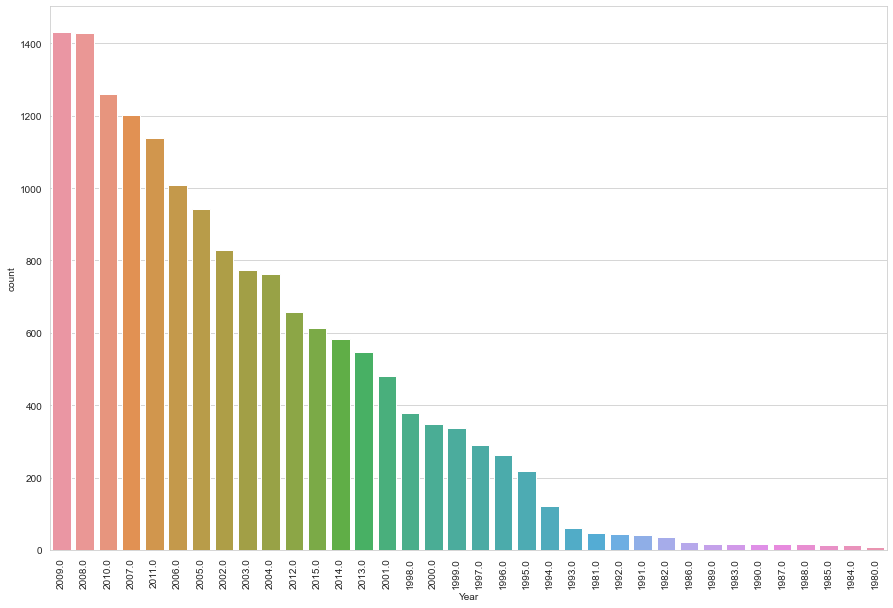

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="Year",data=data,order=data.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index)
#Bu kod, veri kümesindeki oyunları yıllara göre saymak ve bu sayıları yıllara göre sıralamak için kullanılır.
plt.xticks(rotation=90)
#sayma grafiği oluşturuyoruz.
plt.show()

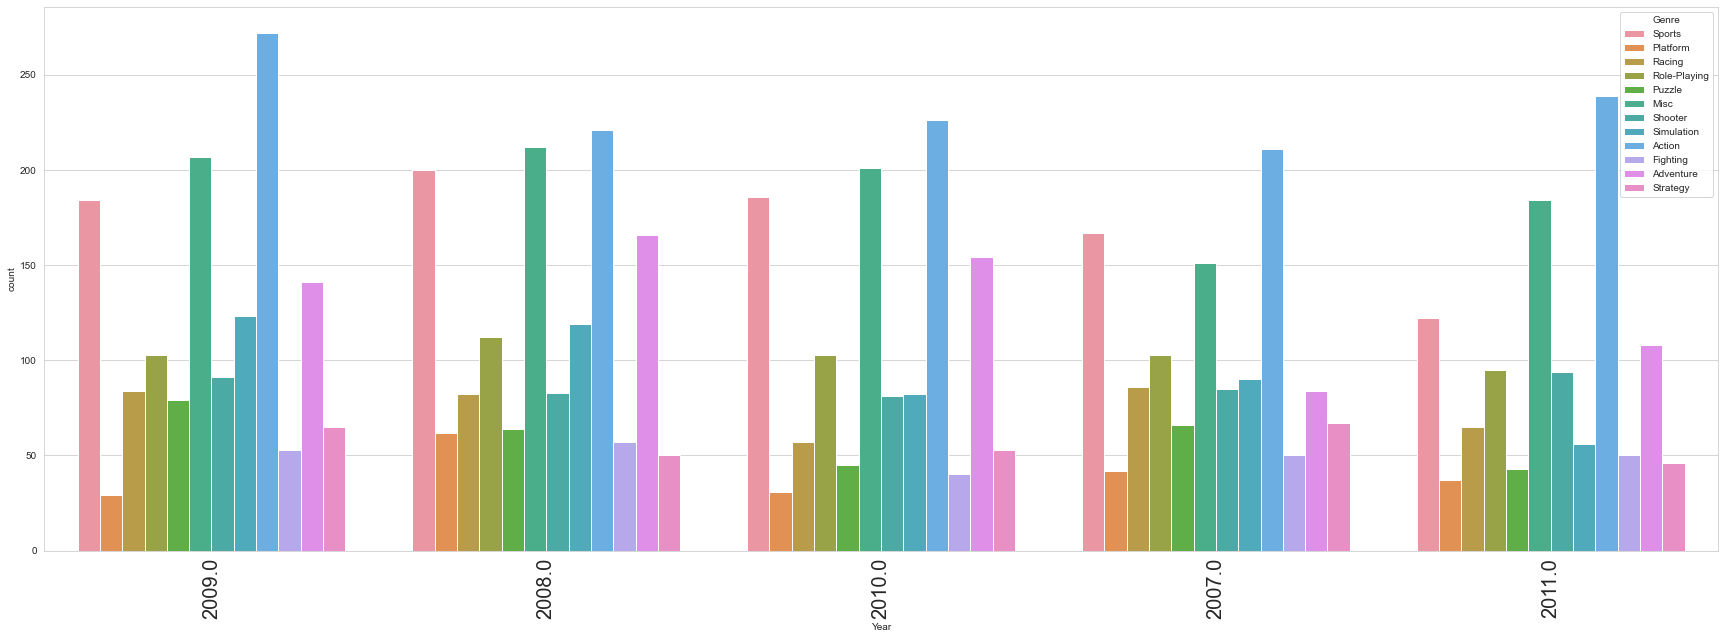

In [17]:
##şimdi tür bazında en çok oyunun çıktığı 5 yılı görelim 
plt.figure(figsize=(30,10))
sns.countplot(x="Year",data=data,hue="Genre",order=data.Year.value_counts().iloc[:5].index) #ilk 5 yılı göreceğiz
plt.xticks(rotation=90,size=20)
plt.show()
#oyun türlerine göre oyunlar ne zaman çıkmışlar bunlara baktık #en çok 2009'muş 

In [18]:
#şimdi de küresel satışlar sütununu kullanarak hangi yılın dünya genelinde en yüksek satış değerlerine ship olduğunu belirleyelim
data_year=data.groupby(by=["Year"])["Global_Sales"].sum()  #önce"Year" yazdık sonra da hangisine göre yapacaksak onu yazdık
data_year=data_year.reset_index()

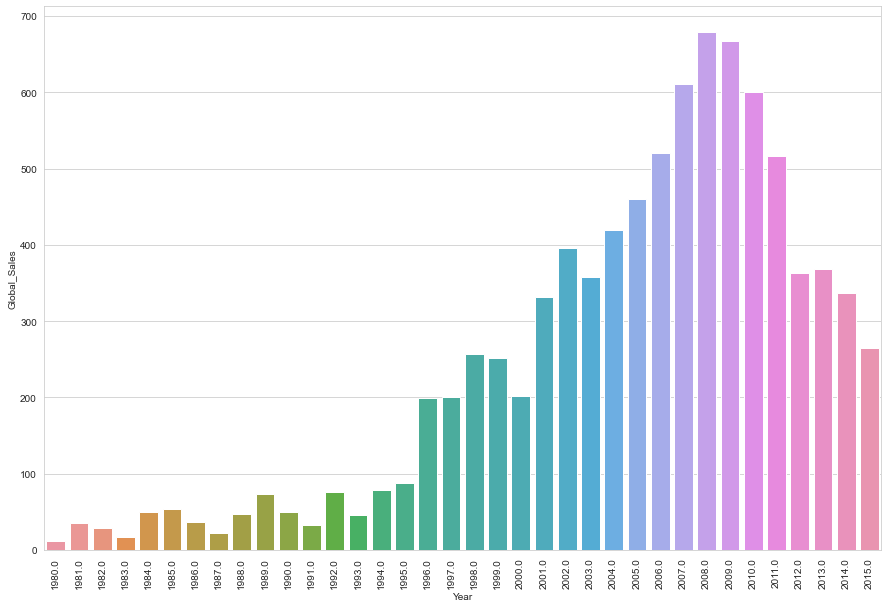

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x="Year",y="Global_Sales",data=data_year) 
plt.xticks(rotation=90,)
plt.show()
#elimizde x ve y değerleri varsa o halde countplot kullanamayız barplot kullanabiliriz!!

In [20]:
#şimdi de bir yılda en çok hangi oyun türü yayınlanmış bunu belirleyelim 
#bunun için yıl ve tür sütunlarına göre gruplama yapalım 
year_max_df=data.groupby(by=["Year","Genre"]).size().reset_index(name="count")#year ve genre veri kümelerini grupladık en yükse değeri bulurken kullanacağız
#size ile büyüklüğü baktık daha sonra count adına bir veri çerçevesi oluşturduk !!!
year_max_idx=year_max_df.groupby(["Year"])["count"].transform(max)==year_max_df["count"] #max olan satırları işaretledik
year_max_genre=year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep="last").reset_index(drop=True)
#bu kod ile her yılın en yüksek sayıya sahip türleirni içeren bir veri çerçevesi elde edebiliiriz

In [21]:
genre=year_max_genre["Genre"].values

In [22]:
genre
#türleri almış olduk 

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

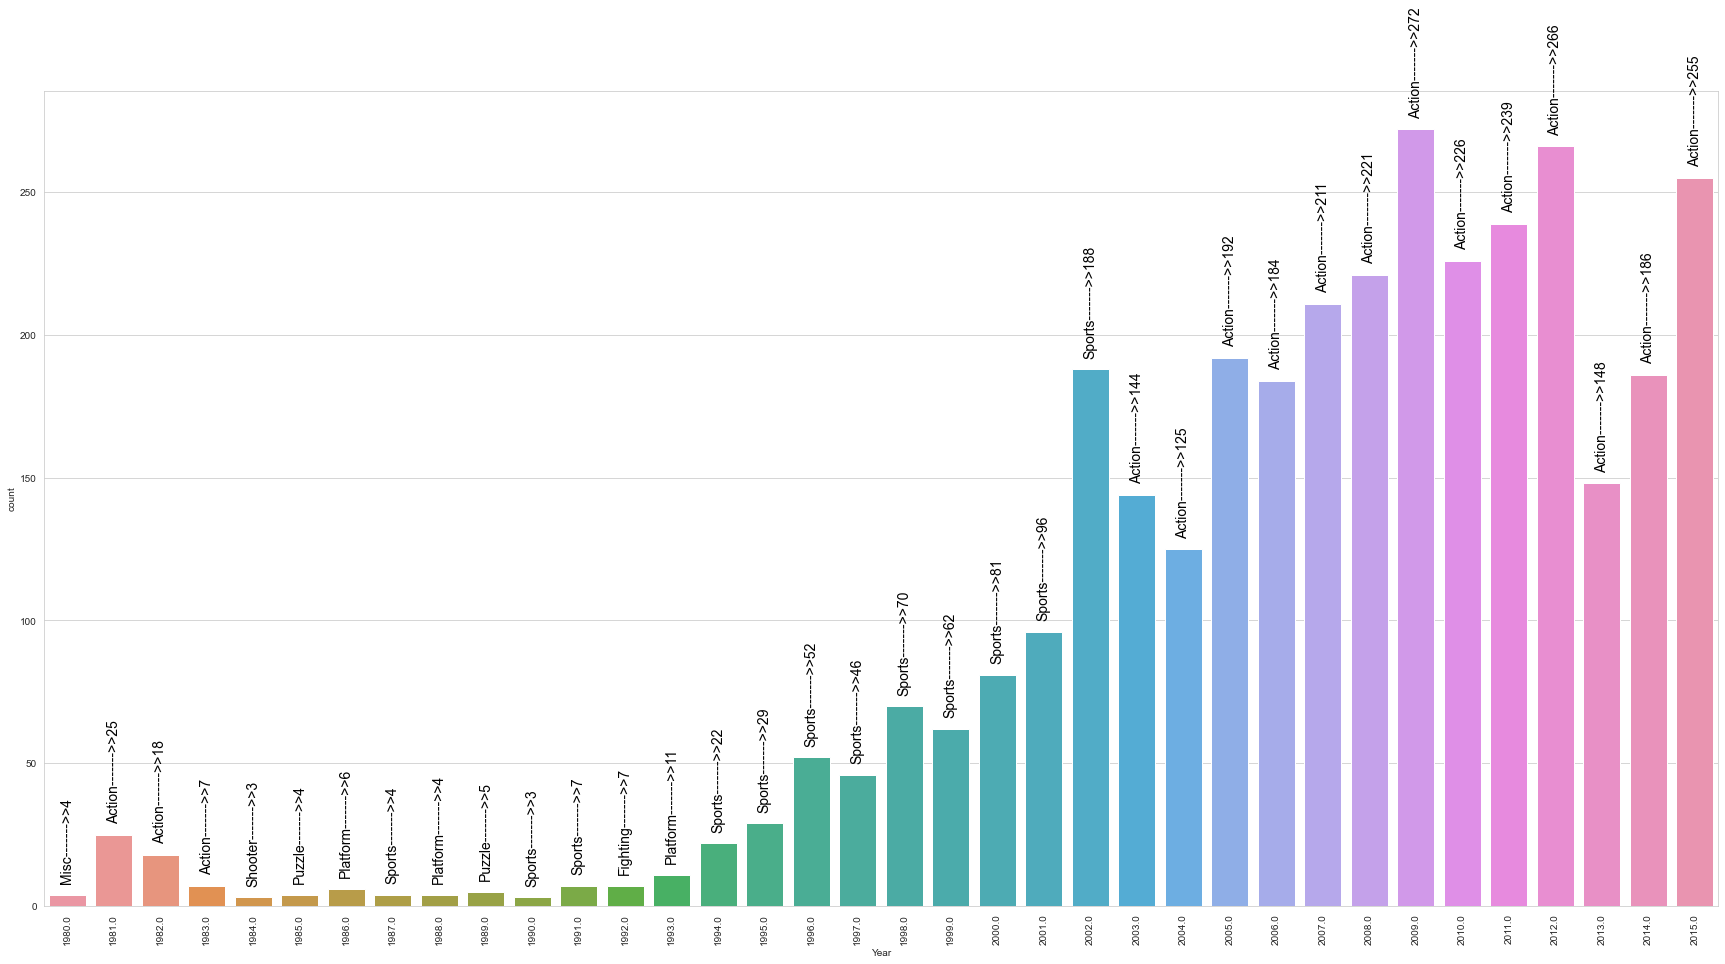

In [23]:
plt.figure(figsize=(30,15)) #burada figürün boyutunu ayarladık 
g=sns.barplot(x="Year",y="count",data=year_max_genre) #seaborn kütüphanesinin barplot'unu kullanarak çubuk grafik çizdik 
index=0
for value in year_max_genre["count"].values: #her çubuk üzerine ilgili türün ve sayısının yazdırılmasını sağladık 
    g.text(index,value+5,str(genre[index]+"------->>"+str(value)),color="#000",size=14,rotation=90,ha="center") #g.text ile yazım işlemlerini yaptık 
        #value değişkeni cinsini ifade ediyor
    index+=1
plt.xticks(rotation=90)
plt.show()
#veriyi görselleştirdik ve yazısını yazdık daha ayrıntılı olması için 
#1 yılda en çok hangi oyun türünün daha fazla yayınlandığını görmüş olduk !!!

In [24]:
#şimdi de 1 yılda en çok satan oyun türü hangisidir bunu görelim 
#satış miktarilarına nakıcaz 
year_sale_dx=data.groupby(by=["Year","Genre"])["Global_Sales"].sum().reset_index()# year ile genre veri kümelerini gruplayıp  
#her yıl içinde global_sales ile toplam küresel satış miktarını hesaplar ve yeni değişkene atar 
year_sale=year_sale_dx.groupby(by=["Year"])["Global_Sales"].transform(max)==year_sale_dx["Global_Sales"]# her yılın en yüksek 
#küresel satış miktarına sahip olan türlerini belirledik  groupby ve tranform işlemlerini kullanrak da her yılın max 
#satış miktarına eşit olan satırları işaretlemiş olduk. 
year_sale_max=year_sale_dx[year_sale].reset_index(drop=True)
#en yüksek küresel satış miktarına sahip olan türleri içeren satırları seçtik ve yeni bir veri çerçevesine atadık

In [25]:
genre=year_sale_max["Genre"]

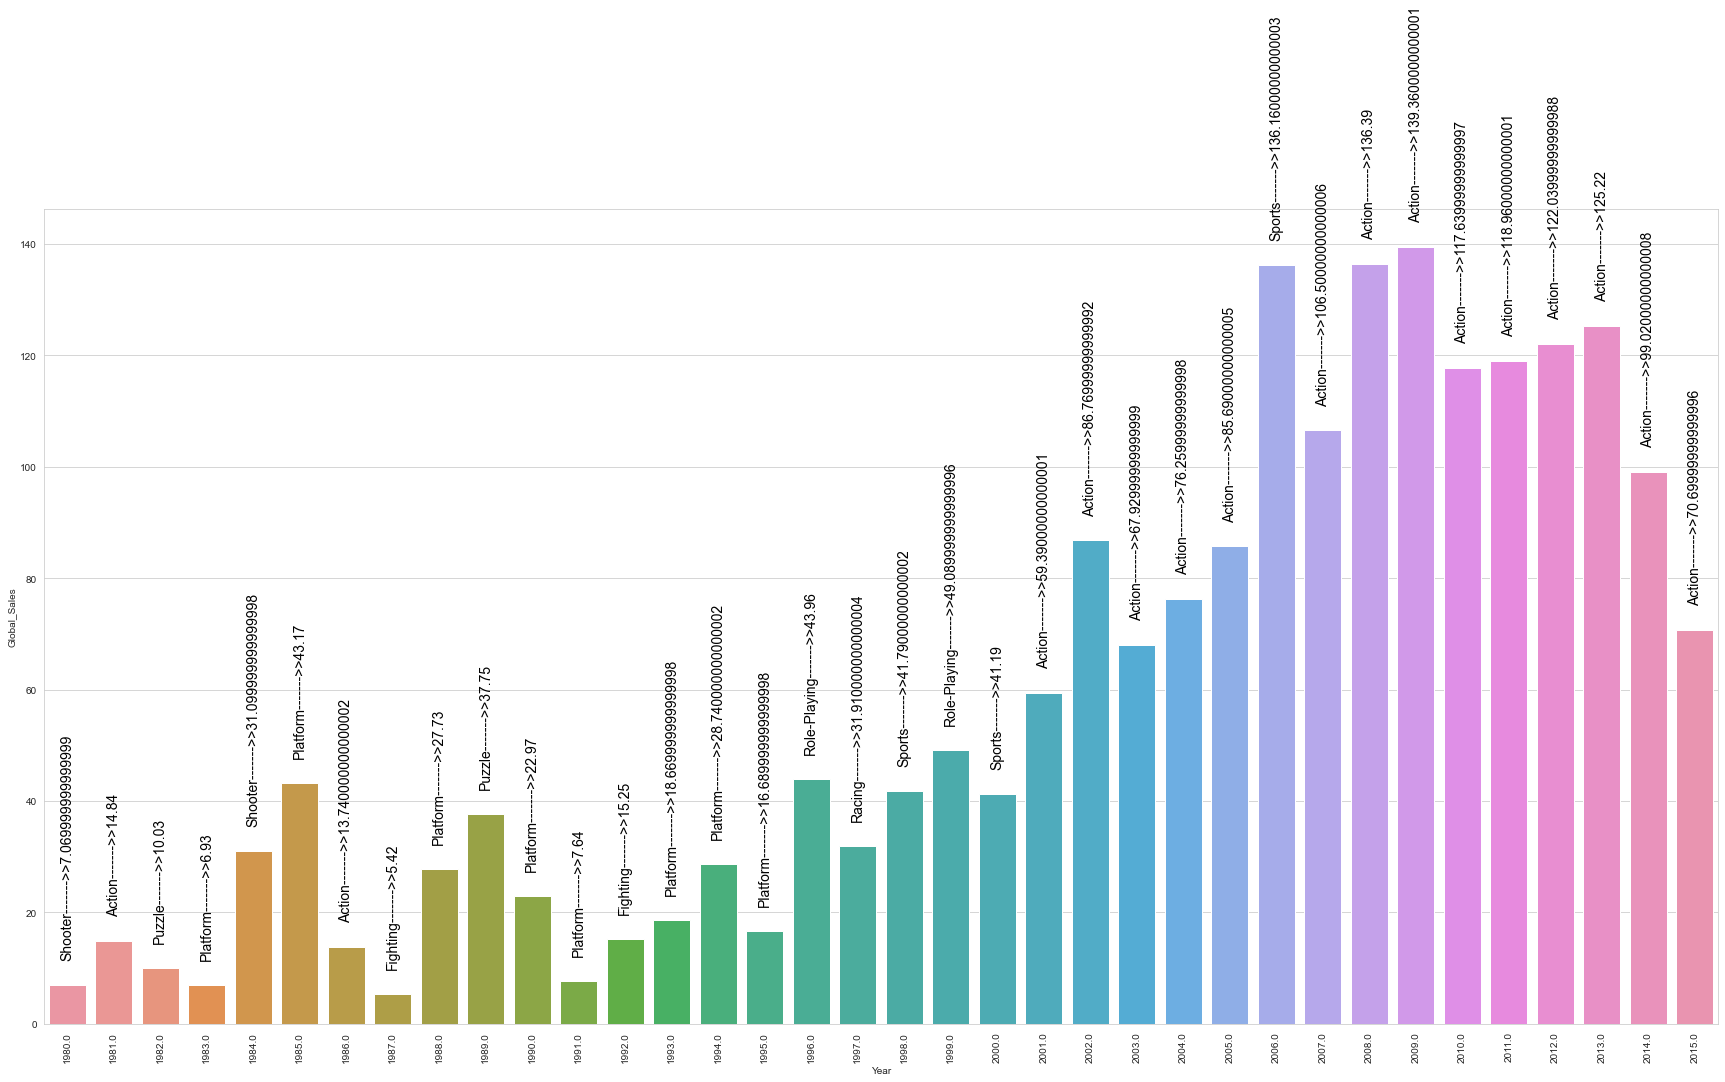

In [26]:
plt.figure(figsize=(30,15)) 
g=sns.barplot(x="Year",y="Global_Sales",data=year_sale_max) 
index=0
for value in year_sale_max["Global_Sales"]: 
    g.text(index,value+5,str(genre[index]+"------->>"+str(value)),color="#000",size=14,rotation=90,ha="center")
    index+=1
plt.xticks(rotation=90)
plt.show()

In [27]:
#küresel olarak en yüksek satış fiyatına sahip oyun türüne bakalım şimdi de 
data_genre=data.groupby(by=["Genre"])["Global_Sales"].sum() #veri kümesinin tür sütununa göre ve her bir türün toplam küresel
#satış miktarına göre hesaplamak için kullnıyourz genre'ye göre gruplaryıp topladık !!!
data_genre=data_genre.reset_index() #oluşturulan veriyi veri çerçevesine dönüştürüp görüntüyü düzeltti 
data_genre=data_genre.sort_values(by=["Global_Sales"],ascending=False)#veri çerçevesini sıraladı ve büyükten küçüğe yaptık 
#sort_values ile sıralama işlemi yapılıyor dikkat et

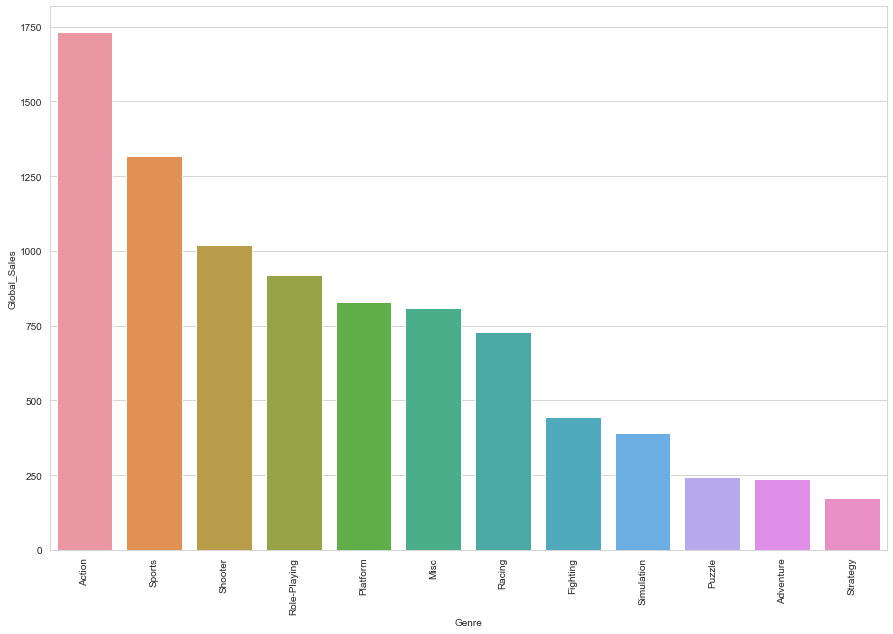

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x="Genre",y="Global_Sales",data=data_genre)
plt.xticks(rotation=90)
#sayma grafiği oluşturuyoruz.
plt.show()

In [29]:
#şimdi de platfromu inceleyelim 
data_platform = data.groupby(by=["Platform"])["Global_Sales"].sum()
data_platform=data_platform.reset_index()
#reset_index diureek DataFrame haline dönüştürüyoruz 
data_platform = data_platform.sort_values(by=["Global_Sales"],ascending=False)

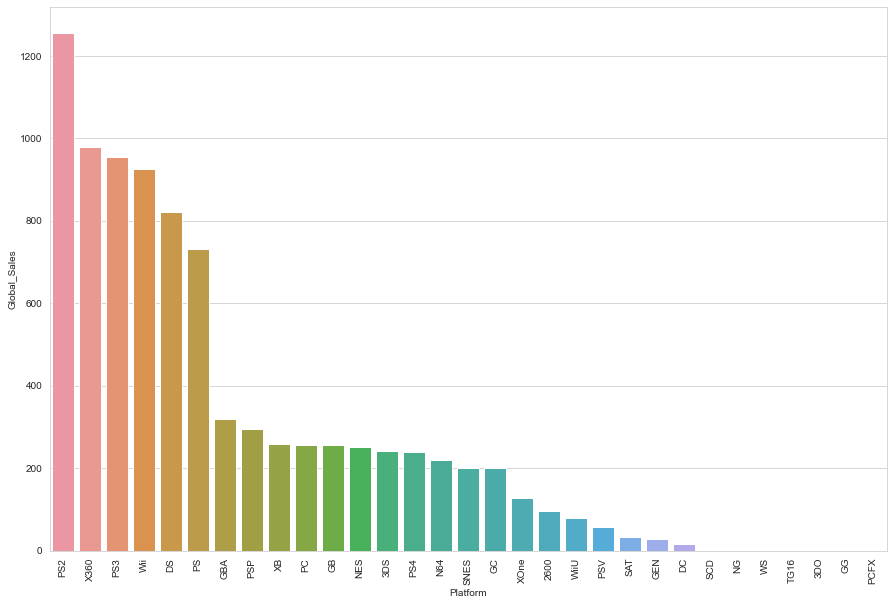

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x="Platform",y="Global_Sales",data=data_platform )
plt.xticks(rotation=90)
#sayma grafiği oluşturuyoruz.
plt.show()
#en çok ps2 için olan oyunlar satılmış dikkat et 

In [31]:
#küresel olarak en yükseksatış fiyatına sahip bireysel oyuna bakalım şimdi de 
top_game_sale = data.head(20) #veri kümesinde ki ilk 20 satırı kullanarak bu veri çerçevesini oluşturduk
top_game_sale = top_game_sale[["Name","Year","Genre","Global_Sales"]]
top_game_sale = top_game_sale.sort_values(by=["Global_Sales"],ascending=False)

In [32]:
name=top_game_sale["Name"]
year=top_game_sale["Year"]
y=np.arange(0,20)

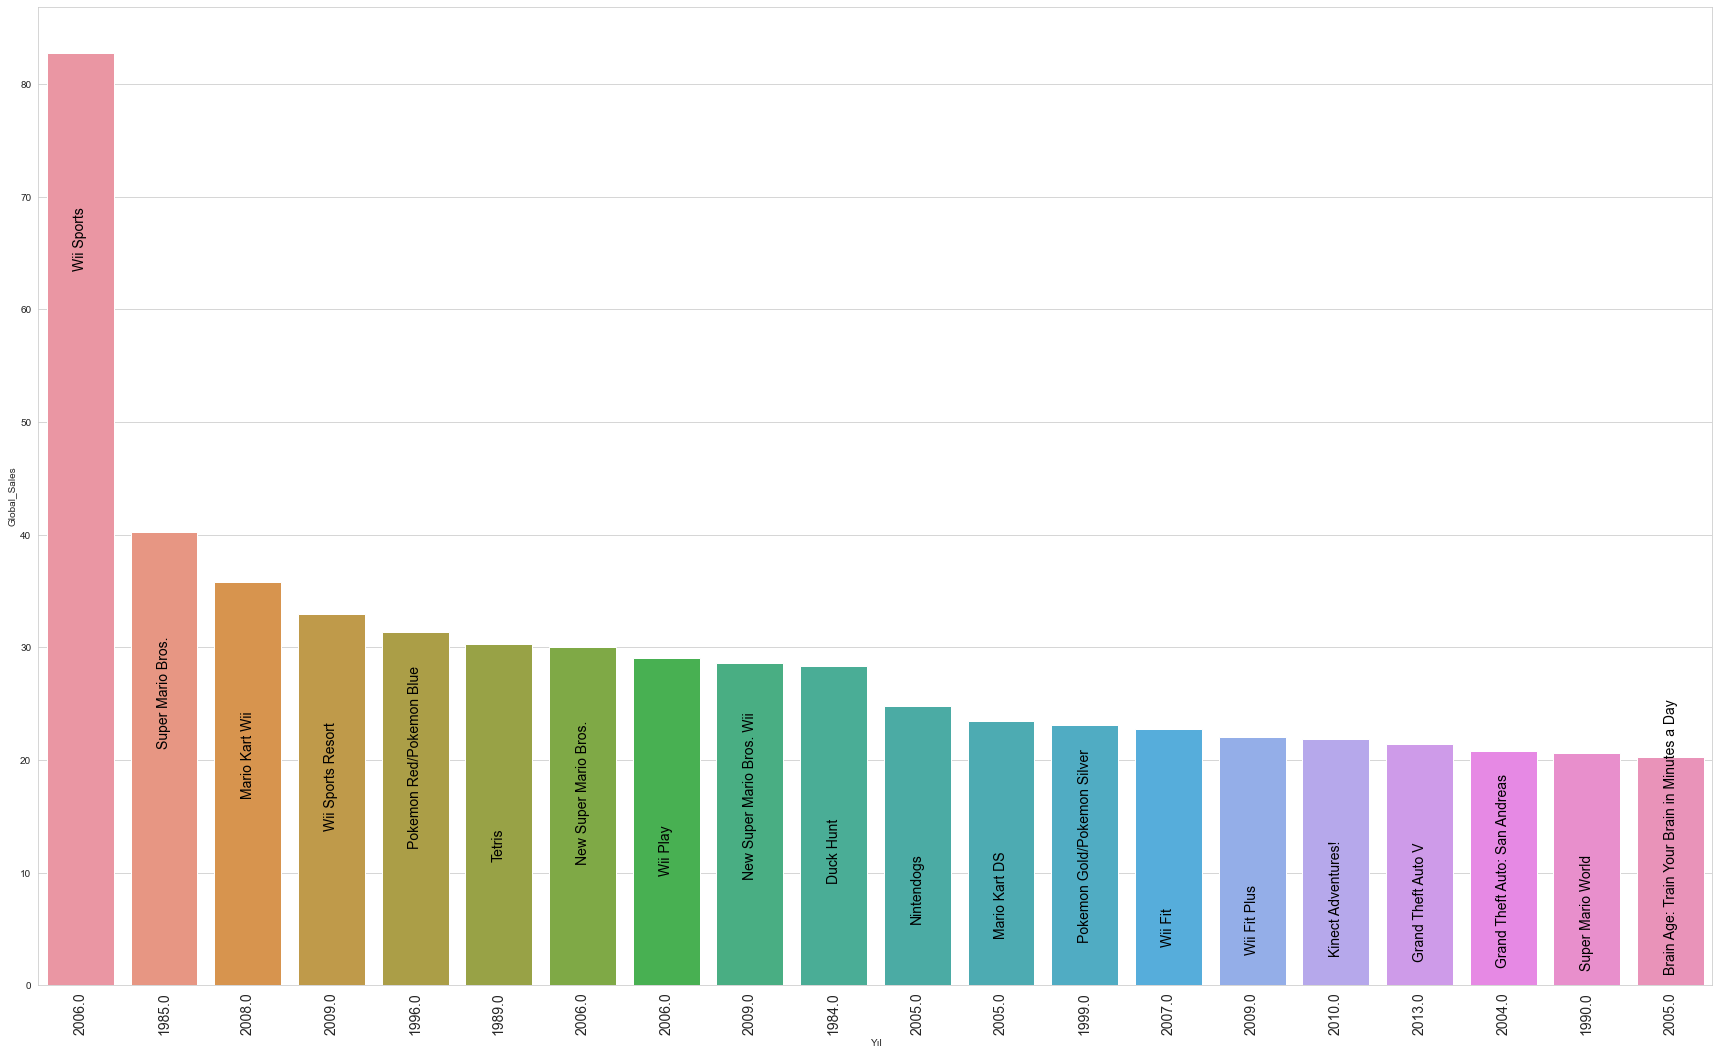

In [33]:
plt.figure(figsize=(30,18)) 
g=sns.barplot(x="Name",y="Global_Sales",data=top_game_sale) 
index=0
for value in top_game_sale["Global_Sales"]: 
    g.text(index,value-19,name[index],color="#000",size=14,rotation=90,ha="center")
    index+=1
plt.xticks(y,top_game_sale["Year"],fontsize=14,rotation=90)
plt.xlabel("Yıl")
plt.show()

In [34]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [35]:
#şimdi de türlere göre satışları karşılaştırlaım 
comp_genre=data[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
comp_map=comp_genre.groupby(by=["Genre"]).sum()

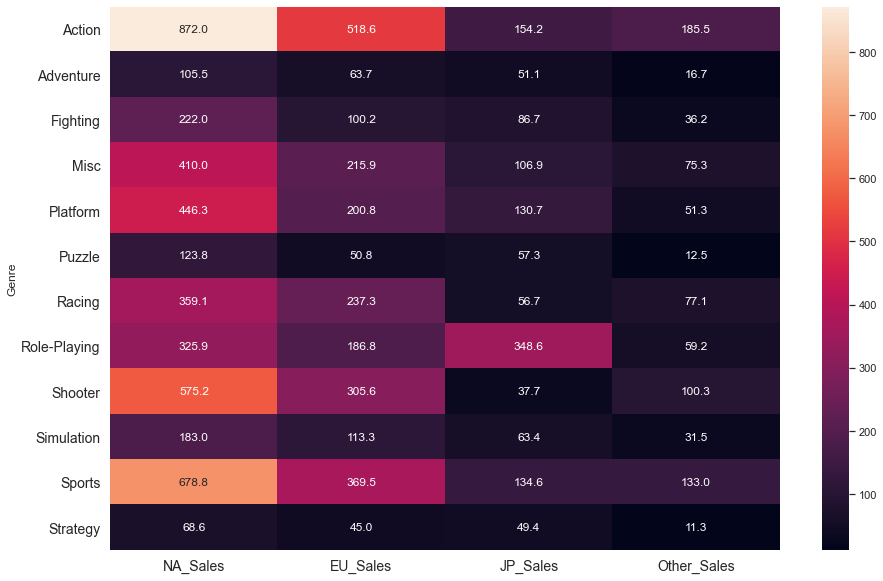

In [36]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(comp_map,annot=True,fmt=".1f")
#annot=True yazılar içinde olsun anlamına geliyor 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
#şimdi de DataFrame oluşturup veri ayıklaması yapalım 
comp_table=comp_map.reset_index() #indexleri resetleyerek df oluşturduk
comp_table = pd.melt(
    comp_table,
    id_vars=["Genre"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name="Sale_Area",
    value_name="Sale_Price"
) #Sale_Area ve Sale_price diye 2 farklı sütun oluşturduk
#melt ile düzenleme işlemleri yaptık 
#biz 4 değişkeni aldık ve sale_area altında birleşitrdik 
comp_table.head()

#en çok hangi bölgede satıldığını doğrdudan tabloda eriştik

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

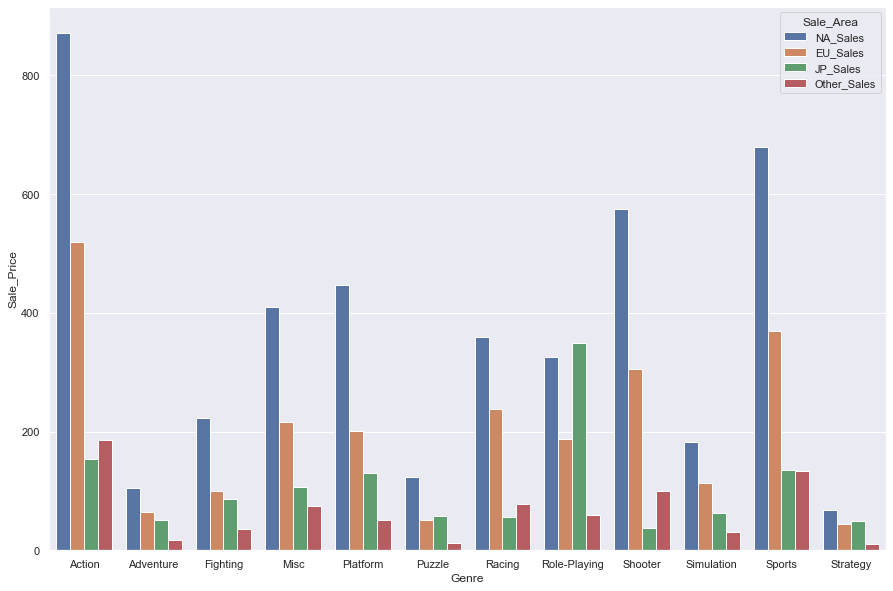

In [38]:
#şimdi de bunu görselleştrileim 
plt.figure(figsize=(15,10))
sns.barplot(x="Genre",y="Sale_Price",hue="Sale_Area",data=comp_table)
#hue : bu parametre renkelndirme çeşitliliğini neye göre yapacağımızı gösteriyor 

In [39]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
#şimdi de platfromalra göre karşılaştırma yapalım 
comp_platform=data[["Platform","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]] #en başta platform var dikkat et buna göre veriyi çekiyoruz
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [41]:
comp_platform=comp_platform.groupby(by=["Platform"]).sum().reset_index()

In [42]:
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.04,57.95,92.32,12.51
3,DC,5.43,1.69,8.56,0.27
4,DS,390.44,194.65,175.57,60.51
5,GB,114.32,47.82,85.12,8.20
6,GBA,187.54,75.25,47.33,7.73
7,GC,133.46,38.71,21.58,5.18
8,GEN,19.27,5.52,2.67,0.89
9,GG,0.00,0.00,0.04,0.00


In [43]:
comp_table = pd.melt(
    comp_platform,
    id_vars=["Platform"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name="Sale_Area",
    value_name="Sale_Price"
)

comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


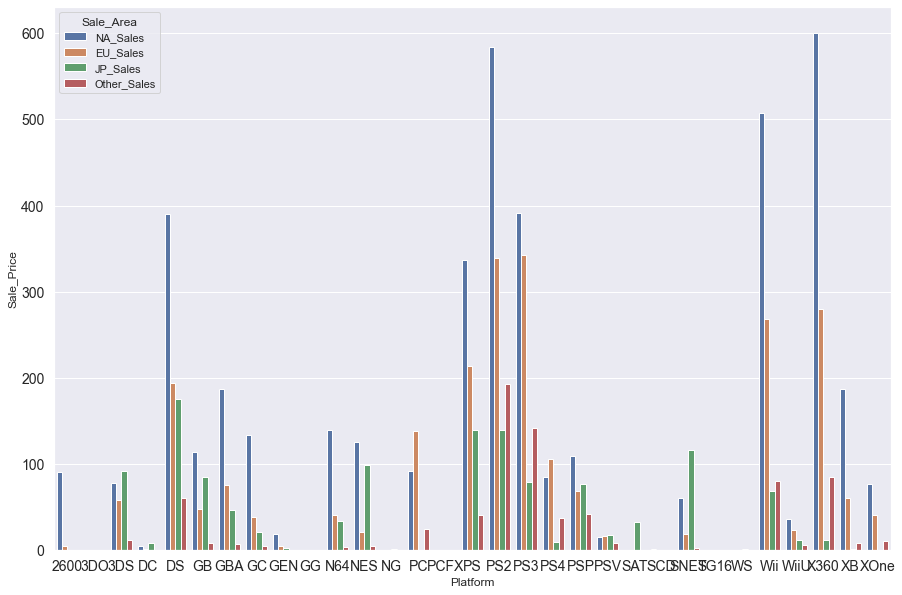

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(x="Platform",y="Sale_Price",hue="Sale_Area",data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [45]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [46]:
#en iyi 20 yayıncıyı bulalım şimdi de 
top_publisher = data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).head(20) #büyükten küçüğe sıraladık
#*****veri kümesini publisher sütununa göre grupluyor ve gruplanmış her yayıncının year sütununu seçiyor
#count ile yayın sayısnı seçiyor sort_values ile de sıralama yapıyor head(20) ile de en çok 20'yi buluyoruz
#publisher sütununa göre gruplandırma yaparak her yayıncının kaç oyun yayınladığını yıllara göre saydık 
top_publisher=pd.DataFrame(top_publisher).reset_index() #oyun satırına göre sıralamayı yapan ve en çok yayın yapan 
#20 yayıncıyı seçtik 

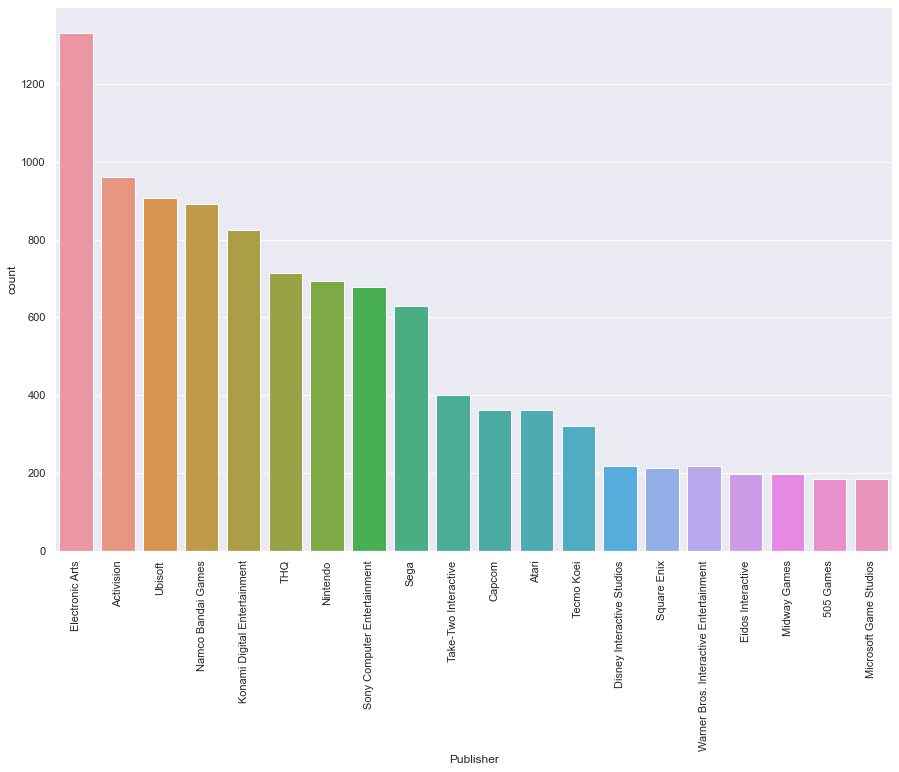

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(x="Publisher",data=data,order=data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).iloc[:20].index)
    #order parametresiyle sıralama işlemi yaptık 
plt.xticks(rotation=90)
#sayma grafiği oluşturuyoruz.
plt.show()             

In [48]:
#yayıncılar arasında en yüksek küresel satışların kime ait olduüunu bulalım şimdi de
sale_publisher=data[["Publisher","Global_Sales"]]
sale_publisher=sale_publisher.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head()
sale_publisher=pd.DataFrame(sale_publisher).reset_index()

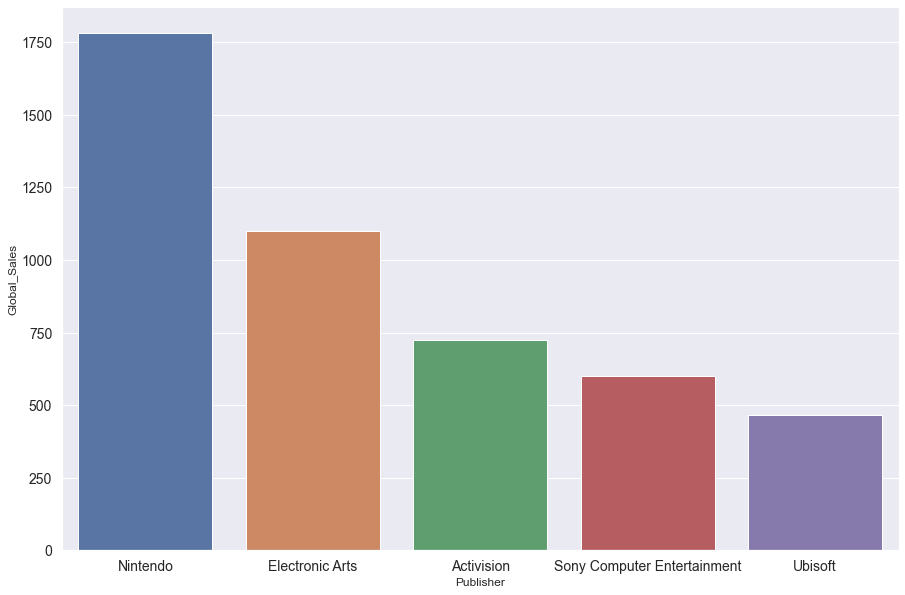

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x="Publisher",y="Global_Sales",data=sale_publisher)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [50]:
#yayıncıları karşılaştıralım şimdi de 
comp_publisher=data[["Publisher","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Global_Sales"]] #en başta platform var dikkat et buna göre veriyi çekiyoruz
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [51]:
comp_publisher=comp_publisher.groupby(by=["Publisher"]).sum().reset_index().sort_values(by=["Global_Sales"],ascending=False)
#global_sales sütununa göre sıralama işlemi yapmış oldu 

comp_publisher=comp_publisher.head()

In [52]:
comp_publisher = pd.melt(
    comp_publisher,
    id_vars=["Publisher"], #publisher sütununu koruyarak diğer sütunları birleştridik 
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], #bunları birleştrdik 
    var_name="Sale_Area", #burad da yeni sütunları oluşturduk 
    value_name="Sale_Price"
)

comp_publisher.head()

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31


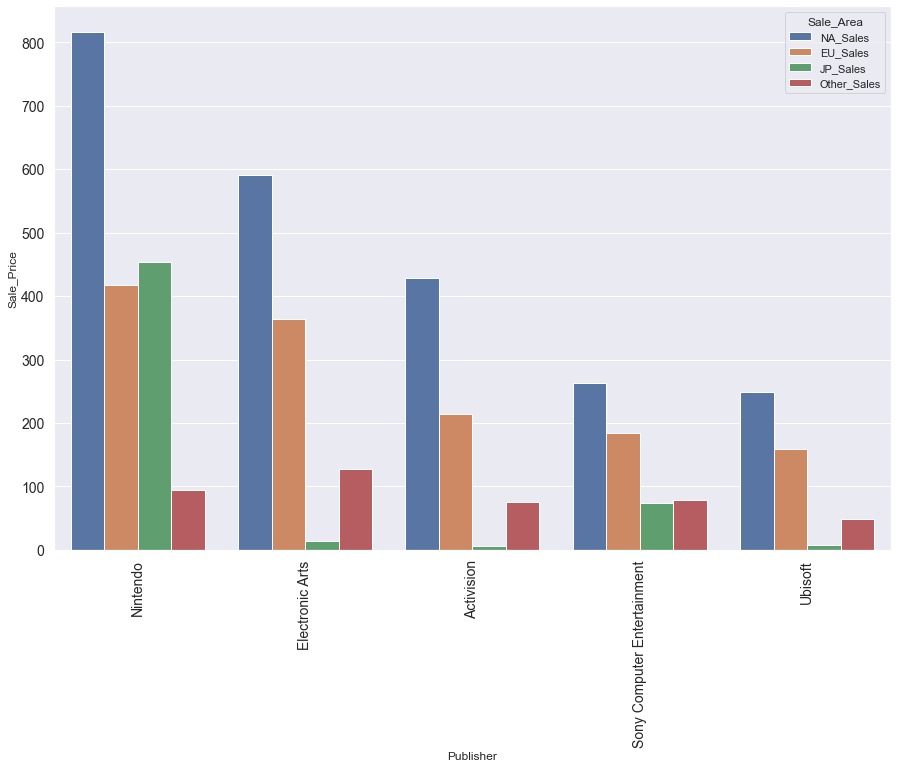

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(x="Publisher",y="Sale_Price",hue="Sale_Area",data=comp_publisher)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [54]:
#her yıl için yayıncıların sayısına göre en üst sıradaki yayıncıyı bulabilir miyiz bakalım şimdi 
top_publisher = data[["Year","Publisher"]]
top_publisher_df=top_publisher.groupby(by=["Year","Publisher"]).size().reset_index(name="count") 
top_publisher_idx=top_publisher_df.groupby(by=["Year"])["count"].transform(max)==top_publisher_df["count"]
top_publisher_count=top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count=top_publisher_count.drop_duplicates(subset=["Year","count"],keep="last").reset_index(drop=True)

In [55]:
publisher=top_publisher_count["Publisher"]

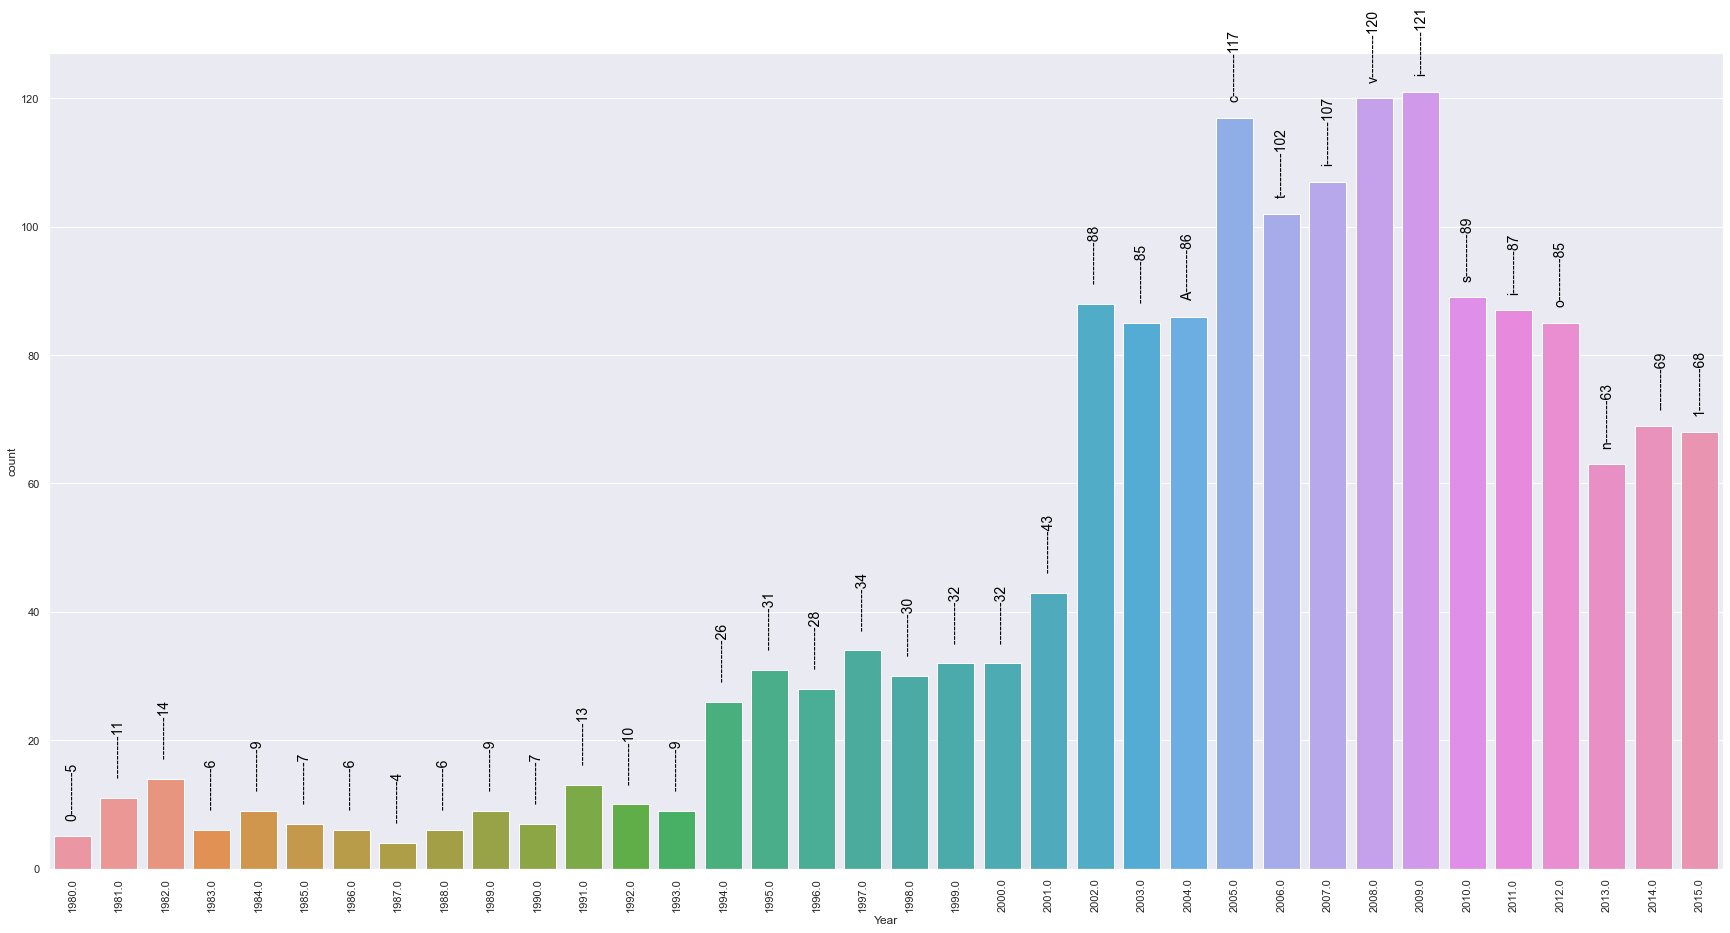

In [56]:
plt.figure(figsize=(30,15))
g=sns.barplot(x="Year",y="count",data=top_publisher_count)
index=0

for value in top_publisher_count["count"].values:
    g.text(index,value+3,str(publisher)[index]+ "---------" + str(value),color="#000",size=14,rotation=90,ha="center")
    index+=1
plt.xticks(rotation=90)
plt.show()